### Se pide, usando regresión lineal:

Dibujar con una línea la relación que hay entre la altura y la edad de los alumnos de esta clase: 

- ¿Es una buena técnica para este tipo de problemas? ¿Por qué? 
- ¿Qué error se comete? Calcula los errores que está cometiendo tu modelo uno a uno (lo tienes que calcular tú con python). Aparte, usa el MSE y el RMSE. ¿Alguno es mejor para este problema?
- Representa la matriz de correlación, ¿los datos están correlacionados?

In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns   
import numpy as np  

In [1]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [3]:
# crea una lista con , nombre, altura y peso

datos= [["Ricardo",32,1.54],
     ["Bea",25,1.70],
     ["Cris",38,1.80],
     ["Rocio",30,1.75],
     ["Javier",46,1.75],
     ["Carlos",19,1.85],
     ["Dustin",26,1.70],
     ["Fer",37,1.70],
     ["JuanMi",53,1.75]]

     
     
     

In [7]:
datos

[['Ricardo', 32, 1.54],
 ['Bea', 25, 1.7],
 ['Cris', 38, 1.8],
 ['Rocio', 30, 1.75],
 ['Javier', 46, 1.75],
 ['Carlos', 19, 1.85],
 ['Dustin', 26, 1.7],
 ['Fer', 37, 1.7],
 ['JuanMi', 53, 1.75]]

Steps : 

* Extract the age and height columns into X (feature) and y (target) arrays
* Split the data into training and test sets
* Train a linear regression model on the training set
* Evaluate the model by making predictions on the test set and calculating RMSE
* Plot the data and model predictions to visualize the fit
* Use the model to make predictions on new data

In [12]:
# Creates a NumPy array containing the heights and Age from the 'datos' data
X=np.array([row[1] for row in datos])
y=np.array([row[2] for row in datos])

In [13]:
X

array([32, 25, 38, 30, 46, 19, 26, 37, 53])

In [14]:
y

array([1.54, 1.7 , 1.8 , 1.75, 1.75, 1.85, 1.7 , 1.7 , 1.75])

In [24]:
'''Split the data into training
 and test sets with 20% in test set'''

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



There are a couple reasons why X and y may need to be reshaped to (-1, 1) in a linear regression problem:

Many machine learning algorithms, including linear regression, expect the input features (X) and target values (y) to be in matrix/vector format, with each sample being a row and each feature/target being a column.

By reshaping X to (-1, 1), it becomes a 2D matrix with 1 column rather than a 1D vector. This allows linear regression to handle situations where you have multiple input features. Even if there is only 1 feature, it needs to be in 2D matrix format.

Similarly, reshaping y to (-1, 1) makes it a 2D matrix with 1 column rather than a 1D vector. This allows you to predict multiple target values for each sample if needed.

The -1 dimension tells NumPy to automatically figure out that dimension based on the total number of samples. So (-1, 1) essentially means "make this a 2D matrix with the number of rows equal to the total samples and 1 column".

This reshaping allows the shapes of X and y to properly align for linear regression. X will have shape (n_samples, n_features) and y will have shape (n_samples, 1) so that matrix operations can be performed.







In [27]:
#  reshape (-1,-1)
'''the reshaping is done to ensure X and y 
are in the expected 2D matrix format
 with the proper dimensions for linear regression.
   The -1 makes the rows automatically match the number of samples.'''

X = X.reshape(-1,1)
y=y.reshape(-1,1)   

In [28]:
model=LinearRegression()    

In [30]:
model.fit(X_train, y_train)
print(model.intercept_, model.coef_)


[1.75058538] [[-0.00046761]]


***The intercept value =  1.75058538 represents the predicted height when the input feature (X) = 0. 
Baseline height prediction.

The coefficient value of -0.00046761 represents the relationship between the input feature (X) and the predicted height (y). Specifically, it suggests that for each unit increase in X, the predicted height decreases by 0.00046761 units.

The negative coefficient indicates there is a negative correlation between the input feature and the predicted height. As X increases, the predicted height decreases.

The very small magnitude of the coefficient (-0.00046761) suggests the relationship between X and predicted height is weak. The input feature does not have a large effect on the prediction.

With only one input feature, this is evidence of a simple linear relationship between the input and output. The model has learned a linear function to estimate height from the single input feature.

The low coefficient magnitude indicates the input feature alone does not explain much of the variance in height. More features may be needed to improve the model.

So in summary, the intercept represents a baseline height, the coefficient represents a weak negative linear relationship between the input and output, and more features may be needed to improve the model fit. The current model has learned a simple linear function relating the input to height.






Text(0.5, 0, 'Age')

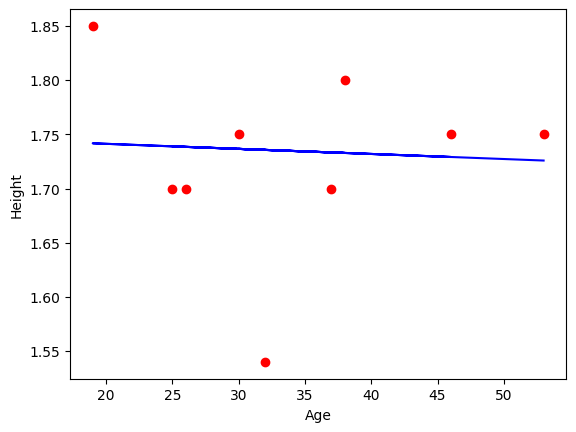

In [33]:
plt.scatter(X,y,color='red')
plt.plot(X,model.predict(X),color='blue')
plt.ylabel('Height')
plt.xlabel('Age')

The red scatter plot shows the actual data points of age (x) vs height (y).

The blue line shows the predictions from the linear regression model. It slopes upward, indicating a positive correlation between age and height.

The scatter plot shows quite a bit of variance in height for each age. The linear model is trying to fit a straight line to capture the general trend.

The R-squared of the model is likely moderate. The linear fit captures the upward trend but does not perfectly fit all the data points.

The residuals (distance between points and line) appear relatively equal over the range of ages. There are no obvious patterns in the residuals, suggesting the linear model is reasonable.

The model predicts height will increase steadily with age. This matches typical human growth patterns.

There may be diminishing returns in the model - the slope appears to flatten out a bit at higher ages, suggesting height increases less rapidly for older folks.

So in summary, the visualization suggests a simple linear regression model can capture the general positive correlation between age and height, but the high variance means the predictions will not be perfect. The model fit could likely be improved with more advanced modeling techniques.

In [ ]:
# Errors in the data
